# Logistic Regression

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [67]:
df=pd.read_csv('Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:
df.shape

(569, 33)

In [69]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [70]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [71]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [72]:
#drop the Unnamed: 32 as it has aall null values
df.drop('Unnamed: 32',axis=1,inplace=True)

In [73]:
#using value_counts we can know each category has how many counts of data
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

#### Inferences 
Benign (B) is patient without cancer(357) and Maligent (M) is patient with cancer (212). Leading to a class imbalance

<Axes: xlabel='diagnosis'>

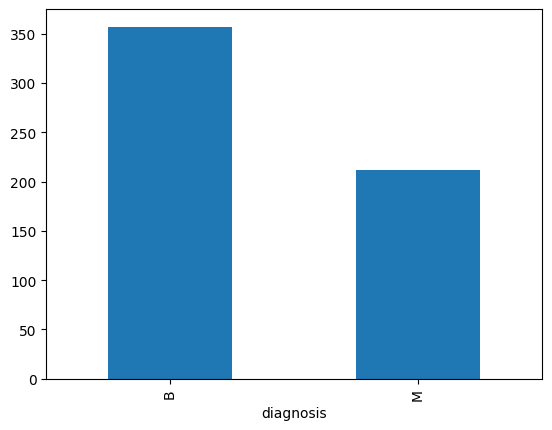

In [74]:
#plot a graph with pandas and without using matplotlib 
df['diagnosis'].value_counts().plot.bar()

<Axes: ylabel='count'>

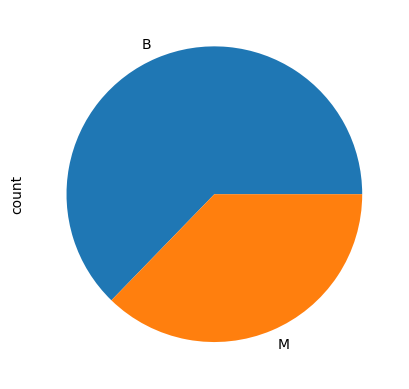

In [75]:
df['diagnosis'].value_counts().plot.pie()

In [76]:
df.iloc[:,2:34].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [77]:
y=df['diagnosis']

In [78]:
X=df.drop('diagnosis', axis=1)

In [79]:
X.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [80]:
y.shape

(569,)

In [81]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
y_encoded=label_enc.fit_transform(y)

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [83]:
print("The no. of datapoints in train dataset",X_train.shape)
print("The no. of datapoints in test dataset",X_test.shape)

The no. of datapoints in train dataset (455, 31)
The no. of datapoints in test dataset (114, 31)


### Building a Logistic Regression Model

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logreg_model=LogisticRegression(solver='newton-cg',max_iter=200)

In [86]:
logreg_model.fit(X_train,y_train)

C:\Users\Keert\anaconda3\envs\JupyterNotebook-IntWebAppEnv\Lib\site-packages\scipy\optimize\_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\Keert\anaconda3\envs\JupyterNotebook-IntWebAppEnv\Lib\site-packages\sklearn\utils\optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\Keert\anaconda3\envs\JupyterNotebook-IntWebAppEnv\Lib\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.11011213724861713. Increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=200, solver='newton-cg')

In [87]:
y_test_pred=logreg_model.predict(X_test)
y_train_pred=logreg_model.predict(X_train)

#### We will evaluate the logistic Regression

In [88]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model on the test dataset:", accuracy_score(y_test,y_test_pred))
print("The accuracy of the model on the train dataset:", accuracy_score(y_train,y_train_pred))

The accuracy of the model on the test dataset: 0.956140350877193
The accuracy of the model on the train dataset: 0.9604395604395605


#### Inferences
From above accuracy score we can be sure that the Logistic Regression model is appropriate fit

In [35]:
from sklearn.metrics import classification_report
print("classification evaluation metrics",classification_report(y_test,y_test_pred)) 

classification evaluation metrics               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Inferences
0 is benign (support: 71 datapoints from 114) and 1 is maligent (support: 43 datapoints from 114)

In [36]:
print("classification evaluation metrics",classification_report(y_train,y_train_pred)) 

classification evaluation metrics               precision    recall  f1-score   support

           0       0.96      0.98      0.97       286
           1       0.96      0.93      0.95       169

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



In [37]:
from sklearn.metrics import confusion_matrix
print("Classification matrix for the dataset is as below:",confusion_matrix(y_test,y_test_pred))

Classification matrix for the dataset is as below: [[70  1]
 [ 4 39]]


Thus in binary classification, the count of 
1. true negatives is : math:`C_{0,0}`: 70, 
2. false negatives is :math:`C_{1,0}`: 4, 
3. true positives is :math:`C_{1,1}`: 39,
4. and false positives is :math:`C_{0,1}`: 1.

In [39]:
from sklearn.metrics import confusion_matrix
print("Classification matrix for the dataset is as below:",confusion_matrix(y_train,y_train_pred))

Classification matrix for the dataset is as below: [[279   7]
 [ 11 158]]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df['Species'].nunique()

3

In [6]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species'>

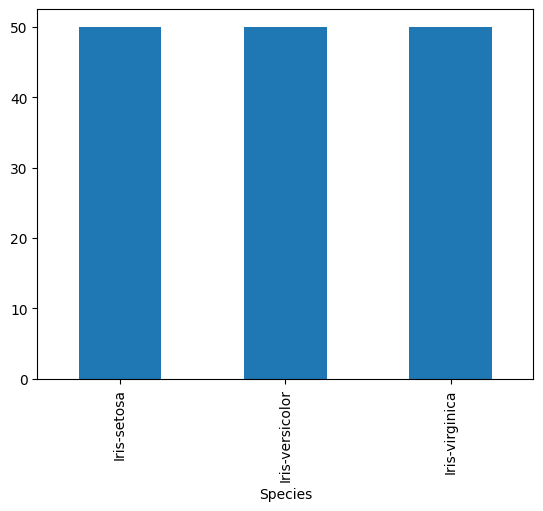

In [7]:
df['Species'].value_counts().plot.bar()

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.drop('Id',axis=1,inplace=True)

### Inferences
- There are no null values in the data
- There 3 output classes (Setosa,versicolor,virginica) with equal representation shown by the bar plot.

In [10]:
# Let's Split the data
X=df.drop('Species',axis=1)
y=df['Species']

In [11]:
df.shape

(150, 5)

In [12]:
label_enc=LabelEncoder()
y_encoded=label_enc.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### By the rule of Label Encoder algorithm,
-0 -> Iris_setosa

-1 -> Iris-versicolor

-2 -> Iris-Virginica


In [13]:
### Let's split data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.25,random_state=21)

In [14]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (112, 4)
X_test (38, 4)
y_train (112,)
y_test (38,)


# Naive Bayes Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
from sklearn.datasets import make_blobs
X,y= make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
X,y

(array([[  0.92141506,  -9.98499137],
        [ -5.26927614,  -9.6186543 ],
        [ -0.45292089,  -6.04316334],
        [ -0.0856312 ,  -2.16867404],
        [  1.53194956,  -0.36022153],
        [ -0.72443515,  -7.44202457],
        [ -0.52577983, -11.34940749],
        [ -1.23044866,  -0.02408431],
        [ -2.25997736,  -8.21779094],
        [  0.77075118,  -7.65464691],
        [  1.90846569,  -0.6583068 ],
        [  2.99659881,  -0.83960814],
        [ -1.75036425,  -8.32495776],
        [  1.26386427,  -0.46380574],
        [ -2.92821038,  -7.10474478],
        [ -1.18679697,  -1.80057881],
        [ -0.70730261,  -8.6320622 ],
        [ -0.597949  ,  -0.40605237],
        [ -3.88704121,  -7.92023943],
        [ -0.49365731,  -8.378556  ],
        [ -0.97378999,  -7.371431  ],
        [  0.7183647 ,   0.23622995],
        [  1.355409  ,  -0.54741367],
        [ -0.47151448, -10.37571491],
        [ -0.95592795, -12.26939394],
        [ -2.5972638 ,  -9.71612662],
        [  0

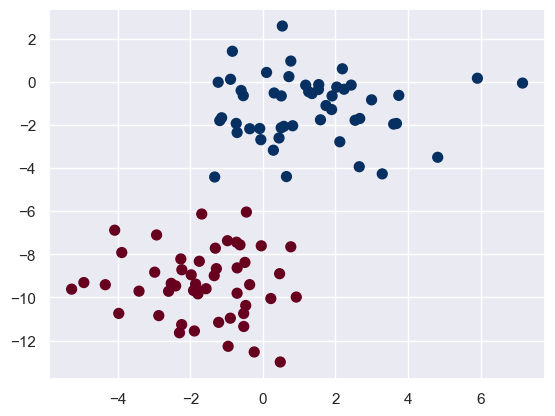

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="RdBu")

In [7]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X,y)

GaussianNB()

# KNN - K Nearest Neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_model=KNeighborsClassifier(n_neighbors=4) #n_neighbors is k value that the user has to give

In [17]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
y_test_pred_knn=knn_model.predict(X_test)
y_train_pred_knn=knn_model.predict(X_train)

### Evaluating the KNN model

In [19]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model on the test dataset:", accuracy_score(y_test,y_test_pred_knn))
print("The accuracy of the model on the train dataset:", accuracy_score(y_train,y_train_pred_knn))

The accuracy of the model on the test dataset: 0.9473684210526315
The accuracy of the model on the train dataset: 0.9642857142857143


In [20]:
from sklearn.metrics import classification_report
print("classification evaluation metrics",classification_report(y_test,y_test_pred_knn)) 

classification evaluation metrics               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [21]:
print("classification evaluation metrics",classification_report(y_train,y_train_pred_knn)) 

classification evaluation metrics               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.92      0.97      0.94        35
           2       0.97      0.93      0.95        40

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



### Inferences
The model is appropriate fit

### Higher the K-value let's check the model


In [22]:
knn_high_model=KNeighborsClassifier(n_neighbors=30)
knn_high_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [23]:
y_test_high_pred_knn=knn_high_model.predict(X_test)
y_train_high_pred_knn=knn_high_model.predict(X_train)

In [24]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model on the test dataset:", accuracy_score(y_test,y_test_high_pred_knn))
print("The accuracy of the model on the train dataset:", accuracy_score(y_train,y_train_high_pred_knn))

The accuracy of the model on the test dataset: 0.8947368421052632
The accuracy of the model on the train dataset: 0.9732142857142857


### Inferences
The model is now a Overfitting model due to high k-value(n_neighbors)

# Support Vector Machine

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model=SVC()

In [27]:
svc_model.fit(X_train,y_train)

SVC()

In [28]:
y_test_pred_svc=svc_model.predict(X_test)
y_train_pred_svc=svc_model.predict(X_train)

### Evaluating the SVC model

In [29]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model on the test dataset:", accuracy_score(y_test,y_test_pred_svc))
print("The accuracy of the model on the train dataset:", accuracy_score(y_train,y_train_pred_svc))

The accuracy of the model on the test dataset: 0.9210526315789473
The accuracy of the model on the train dataset: 0.9910714285714286


### NOTE: The accuracy for test and train data are having some huge gap as the test and train split , test_size is given 0.25 which has a huge difference. Try out same with different test_size

In [30]:
from sklearn.metrics import classification_report
print("classification evaluation metrics",classification_report(y_test,y_test_pred_svc)) 

classification evaluation metrics               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.87      0.90        15
           2       0.82      0.90      0.86        10

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [31]:
print("classification evaluation metrics",classification_report(y_train,y_train_pred_svc)) 

classification evaluation metrics               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        35
           2       1.00      0.97      0.99        40

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112



# Ensemble Learning

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [50]:
df=pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [51]:
df.shape

(299, 28)

In [52]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [53]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [54]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

### Inferences
Found that the null values in few columns are too much that we have to decide whether to fill it or drop it. In technical point we should discuss with the domain expert how important those columns are which a majority of null values. For Example: nasogastric_reflux_ph column has 246 null values when total rows are 299. So, more than 50% there are null values. But, we can drop now but while you are data scientist you should ask the experts before removing the columns

In [56]:
from sklearn.impute import SimpleImputer
for i in df.columns:
    if df[i].hasnans:
        if df[i].isnull().sum()>=150:
            #print(i,"-",df[i].dtype)
            df.drop(i,axis=1,inplace=True)         

In [57]:
df.shape

(299, 25)

In [62]:
for i in df.columns:
    if df[i].hasnans:
        print(i,"-",df[i].dtype)
        #fill the numerical columns with mean value
        if df[i].dtype=="float64":
           df[i].fillna(df[i].mean(),inplace=True)
        else:
        #fill the categorical columns with the most occuring category and we can use mode for that
            if df[i].dtype=="O":
                #the mode function returns Series object, so if we have to get a specific value we should use indexing([0] will return the most occuring category)
                df[i].fillna(df[i].mode()[0],inplace=True)
print(df.isnull().sum())         

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


### Inferences
From above output we can be sure that all the columns with null values below 50% null values have been filled with appropriate method 

In [61]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,decreased,distend_large,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,absent,distend_large,74.0,7.4,died,no,4300,0,0,no


### Split data to X and y

In [69]:
X=df.drop('outcome',axis=1)
y=df.outcome

In [70]:
X.shape

(299, 24)

In [71]:
y.shape

(299,)

### Encode the categorical features (One Hot Encoding) and output column(Label Encoding)


In [72]:
#get_dummies will identify the categorical columns and encode it
X_encoded=pd.get_dummies(X)

In [73]:
#new encoded columns are added
X_encoded.shape

(299, 62)

In [75]:
from sklearn.preprocessing import LabelEncoder
label_Enc=LabelEncoder()
y_encoded=label_Enc.fit_transform(y)
print(y_encoded)

[0 1 2 0 0 2 2 0 1 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 1 2 2 2 1 1
 2 2 0 0 2 2 1 1 0 2 2 0 0 2 0 2 2 1 0 2 0 0 0 2 2 0 1 2 2 2 2 2 2 1 2 0 0
 0 1 2 2 0 2 0 2 2 0 2 2 0 1 2 2 2 0 2 0 2 2 2 1 2 2 2 1 2 2 0 2 2 2 1 0 0
 2 2 0 2 2 2 1 2 2 2 1 2 0 1 2 2 2 1 2 0 0 2 0 0 0 2 2 2 2 0 0 2 1 2 2 0 2
 2 2 0 2 2 2 2 2 1 2 2 2 0 2 1 2 1 2 2 2 1 2 0 2 0 0 2 2 0 2 1 0 2 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 0 2 2 2 0 1 2 2 1 2 0 1 2 0 0 2 2 2 2 2 2 1 2 1 2 2
 2 2 2 0 2 1 2 2 0 2 2 2 0 2 2 1 1 0 2 0 2 2 0 2 0 2 2 1 0 0 2 2 0 1 0 2 0
 2 2 2 0 2 1 2 2 2 2 0 2 2 0 1 0 1 2 2 2 2 0 0 2 2 2 1 2 2 2 2 0 0 1 2 1 1
 0 2 1]


#### We can infer that
0 -> dies

1 -> Euthanized

2 -> lived

In [64]:
df.outcome.value_counts()

outcome
lived         178
died           77
euthanized     44
Name: count, dtype: int64

<Axes: xlabel='outcome'>

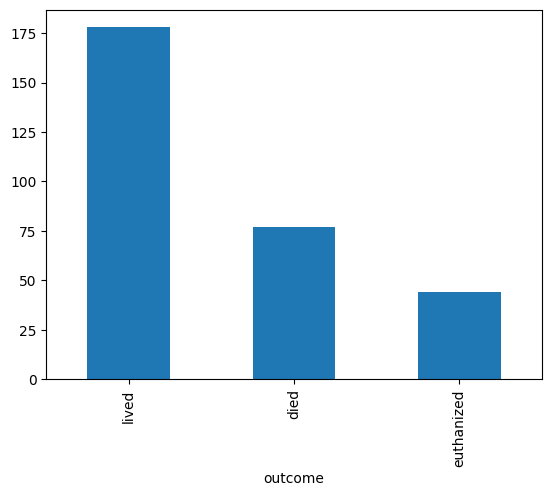

In [65]:
df.outcome.value_counts().plot.bar()

### SMOTE- Synthetic Minority Oversampling Technique
OverSampling - The datapoints for the classes that have lesser representation are synthetically and they are created using oversampling techniques like SMOTE

In [66]:
#Library for SMOTE method
!pip install imbalanced-learn

In [67]:
import imblearn
print(imblearn.__version__)

0.13.0


In [78]:
from imblearn.over_sampling import SMOTE
#instantiate the object method for SMOTE method
oversample=SMOTE()
X_smote,y_smote=oversample.fit_resample(X_encoded,y_encoded) #always pass both the X and y values

In [79]:
pd.Series(y_encoded).value_counts()

2    178
0     77
1     44
Name: count, dtype: int64

In [80]:
pd.Series(y_smote).value_counts()

0    178
1    178
2    178
Name: count, dtype: int64

### Let's split data into train and test data

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.3,random_state=5)

In [84]:
print("The no. of datapoints in train dataset",X_train.shape)
print("The no. of datapoints in test dataset",X_test.shape)

The no. of datapoints in train dataset (373, 62)
The no. of datapoints in test dataset (161, 62)


### Random Forest Classifier Algorithm

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=110) #n_estimators is number of decision trees

In [90]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=110)

In [91]:
y_test_pred_rfc=rfc_model.predict(X_test)
y_train_pred_rfc=rfc_model.predict(X_train)

### Evaluating the RVC model

In [92]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model on the test dataset:", accuracy_score(y_test,y_test_pred_rfc))
print("The accuracy of the model on the train dataset:", accuracy_score(y_train,y_train_pred_rfc))

The accuracy of the model on the test dataset: 0.8757763975155279
The accuracy of the model on the train dataset: 1.0


In [93]:
from sklearn.metrics import classification_report
print("classification evaluation metrics",classification_report(y_test,y_test_pred_rfc)) 

classification evaluation metrics               precision    recall  f1-score   support

           0       0.82      0.89      0.85        53
           1       0.96      0.92      0.94        59
           2       0.83      0.82      0.82        49

    accuracy                           0.88       161
   macro avg       0.87      0.87      0.87       161
weighted avg       0.88      0.88      0.88       161



### Experiment the RFC with X_encoded and y_encoded (data before oversampling) 

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y_encoded,test_size=0.3,random_state=5)

In [95]:
print("The no. of datapoints in train dataset",X_train.shape)
print("The no. of datapoints in test dataset",X_test.shape)

The no. of datapoints in train dataset (209, 62)
The no. of datapoints in test dataset (90, 62)


### Different values for n_estimators

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=90)

In [100]:
rfc_model.fit(X_train,y_train)
y_test_pred_encoded_rfc=rfc_model.predict(X_test)
y_train_pred_encoded_rfc=rfc_model.predict(X_train)

### Evaluating the RFC model with encoded data (without oversampling)

In [101]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model on the test dataset:", accuracy_score(y_test,y_test_pred_encoded_rfc))
print("The accuracy of the model on the train dataset:", accuracy_score(y_train,y_train_pred_encoded_rfc))

The accuracy of the model on the test dataset: 0.7777777777777778
The accuracy of the model on the train dataset: 1.0
